# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

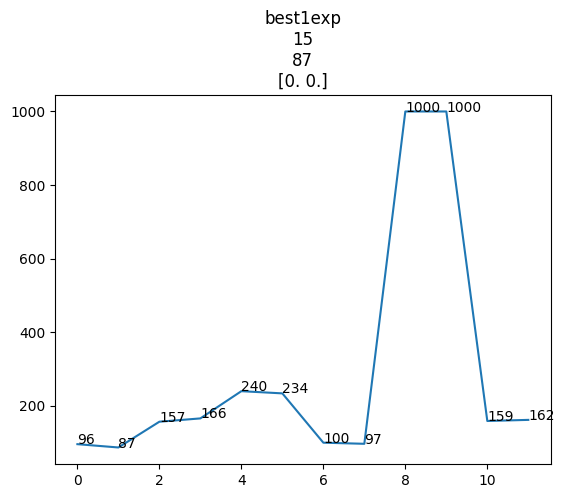

In [31]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e


bounds = [(-10, 10), (-10, 10)]

strateg = [
    'best1bin', 'best1exp', 'rand1bin', 'rand1exp', 'rand2bin', 'rand2exp',
    'randtobest1bin', 'randtobest1exp', 'currenttobest1bin',
    'currenttobest1exp', 'best2exp', 'best2bin'
]

res = []
y = []
for s in strateg:
    tr = differential_evolution(ackley, bounds, seed=42, strategy=s)
    res.append({"stratege": s, "popsize": 15, "r": tr})
    y.append(tr.nit)


res_min = sorted(filter(lambda x: x['r'].success, res), key=lambda x: x['r'].nit)[0]

x = np.linspace(0, len(y)-1, len(y))
plt.plot(x, y)
for x_val in range(len(x)):
    plt.annotate(y[x_val], (x[x_val], y[x_val]))
plt.title(F"{res_min['stratege']}\n{res_min['popsize']}\n{res_min['r'].nit}\n{res_min['r'].x}")
plt.show()



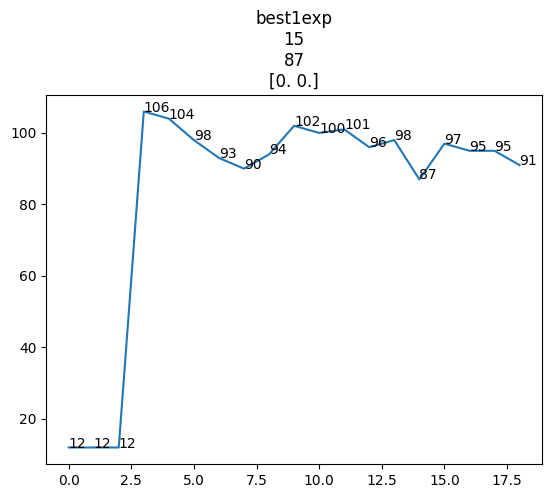

In [49]:
res = []
y = []
for rng in range(1, 20):
    tr = differential_evolution(ackley, bounds, seed=42, strategy="best1exp", popsize=rng)
    res.append({"stratege": "best1exp", "popsize": rng, "r": tr})
    y.append(tr.nit)


res_min = sorted(filter(lambda x: (x['r'].success and x['r'].x[0] == 0.0), res), key=lambda x: x['r'].nit)[0]
# print(res_min)
x = np.linspace(0, len(y)-1, len(y))
plt.plot(x, y)
for x_val in range(len(x)):
    plt.annotate(y[x_val], (x[x_val], y[x_val]))
plt.title(F"{res_min['stratege']}\n{res_min['popsize']}\n{res_min['r'].nit}\n{res_min['r'].x}")
plt.show()

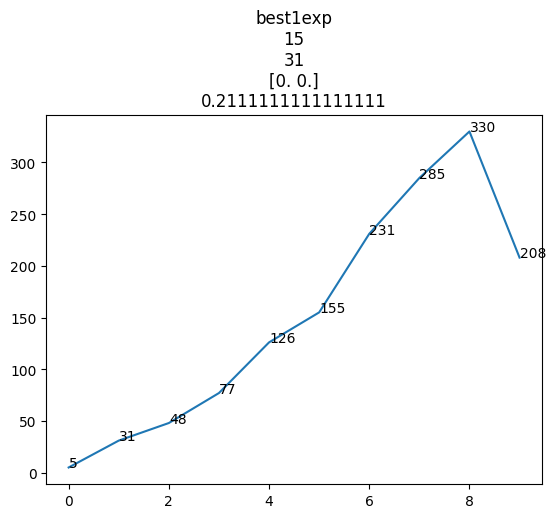

In [50]:
res = []
y = []
for mut in np.linspace(0, 1.9, 10):
    tr = differential_evolution(ackley, bounds, seed=42, strategy="best1exp", popsize=15, mutation=mut)
    res.append({"stratege": "best1exp", "popsize": 15, "mut": mut, "r": tr})
    y.append(tr.nit)

res_min = sorted(filter(lambda x: (x['r'].success and x['r'].x[0] == 0.0), res), key=lambda x: x['r'].nit)[0]
# print(res_min)
x = np.linspace(0, len(y)-1, len(y))
plt.plot(x, y)
for x_val in range(len(x)):
    plt.annotate(y[x_val], (x[x_val], y[x_val]))
plt.title(F"{res_min['stratege']}\n{res_min['popsize']}\n{res_min['r'].nit}\n{res_min['r'].x}\n{res_min['mut']}")
plt.show()

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [56]:
from scipy.optimize import minimize

x0 = [5,5]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 12.63226905409916
             x: [ 4.986e+00  4.986e+00]
           nit: 28
          nfev: 53
 final_simplex: (array([[ 4.986e+00,  4.986e+00],
                       [ 4.986e+00,  4.986e+00],
                       [ 4.986e+00,  4.986e+00]]), array([ 1.263e+01,  1.263e+01,  1.263e+01]))

In [ ]:
### YOUR CODE HERE

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
